![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 3. Modelamiento

Una vez preparados los datos, se procederá con el modelamiento. Recuerden que el objetivo es clasificar a un paciente como hospitalizado o no hospitalizado, teniendo en cuenta un data set que contiene información referente a antecedentes del paciente, morbilidad asociada al paciente y antecedentes relacionados con la toma de la biopsia y complicaciones infecciosas.




Carguen la base de datos preparada desde la fase 2.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("BBDD_Hospitalización_CSV_José.csv")

Separen el dataset en X, y (variable objetivo)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

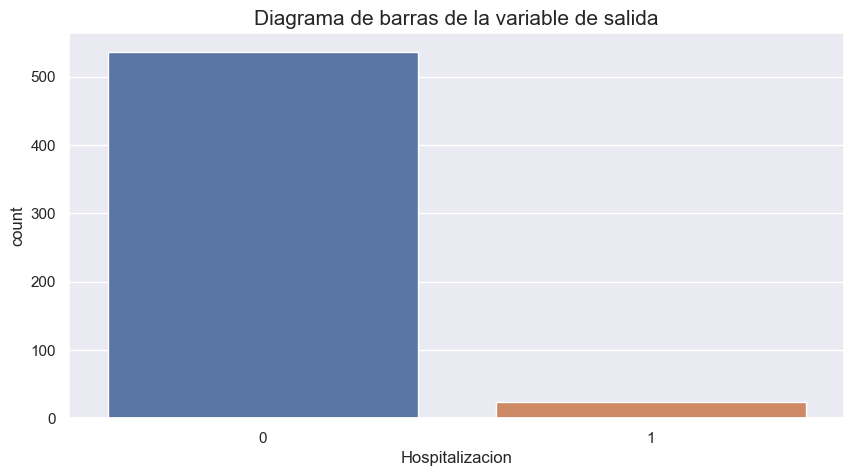

In [4]:
#Diagrama de barras de la variable de salida
plt.figure(figsize=(10,5))
sns.countplot(x = 'Hospitalizacion' ,label= 'Count', data = data)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

Como hay mucha diferencia entre las salidas de las variables vamos a hacer un sobremuestreo aleatorio (Oversampling) a nuestra data

In [5]:
from imblearn.over_sampling import RandomOverSampler

# Supongamos que tienes un DataFrame llamado "df" con características (features) y etiquetas (labels)

# Separar características y etiquetas
X = data.drop('Hospitalizacion', axis=1)
y = data['Hospitalizacion']

# Instanciar el objeto RandomOverSampler
oversampler = RandomOverSampler()

# Aplicar oversampling a las características y etiquetas
X_over, y_over = oversampler.fit_resample(X, y)

# Crear un nuevo DataFrame con las características y etiquetas oversampleadas
data = pd.concat([X_over, y_over], axis=1)


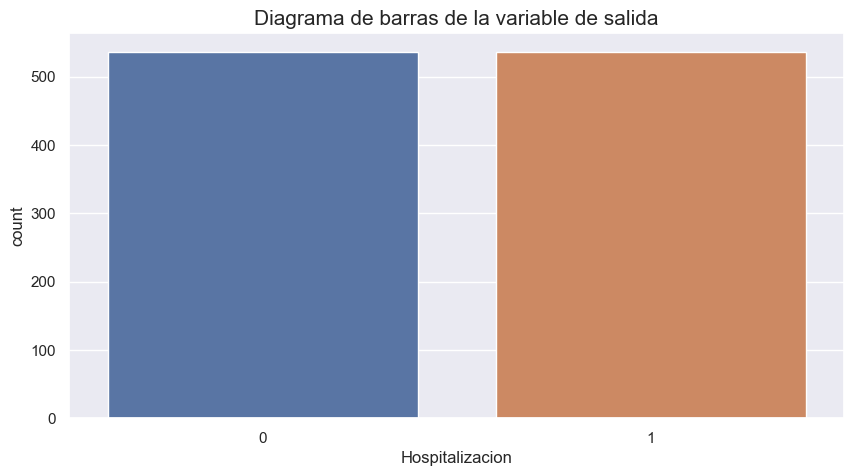

In [6]:
#Diagrama de barras de la variable de salida
plt.figure(figsize=(10,5))
sns.countplot(x = 'Hospitalizacion' ,label= 'Count', data = data)
plt.title('Diagrama de barras de la variable de salida', fontsize = 15)
plt.show()

In [7]:
#Cambiamos el nombre de la variable para ver mejor el grafico de calor.
data.rename(columns={'Num dias post biopsia en que se presenta la infeccion': 'Num dias post bio'}, inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Edad                        1074 non-null   int64  
 1   Diabetes                    1074 non-null   int64  
 2   Hospitalizacion ultimo mes  1074 non-null   int64  
 3   PSA                         1074 non-null   float64
 4   Biopsias previas            1074 non-null   int64  
 5   Volumen prostatico          1074 non-null   int64  
 6   Numero de muestras tomadas  1074 non-null   int64  
 7   CUP                         1074 non-null   int64  
 8   Enf. cronica pulmonar       1074 non-null   int64  
 9   Biopsia                     1074 non-null   int64  
 10  Fiebre                      1074 non-null   int64  
 11  ITU                         1074 non-null   int64  
 12  Tipo de cultivo             1074 non-null   int64  
 13  Patron de resistencia       1074 

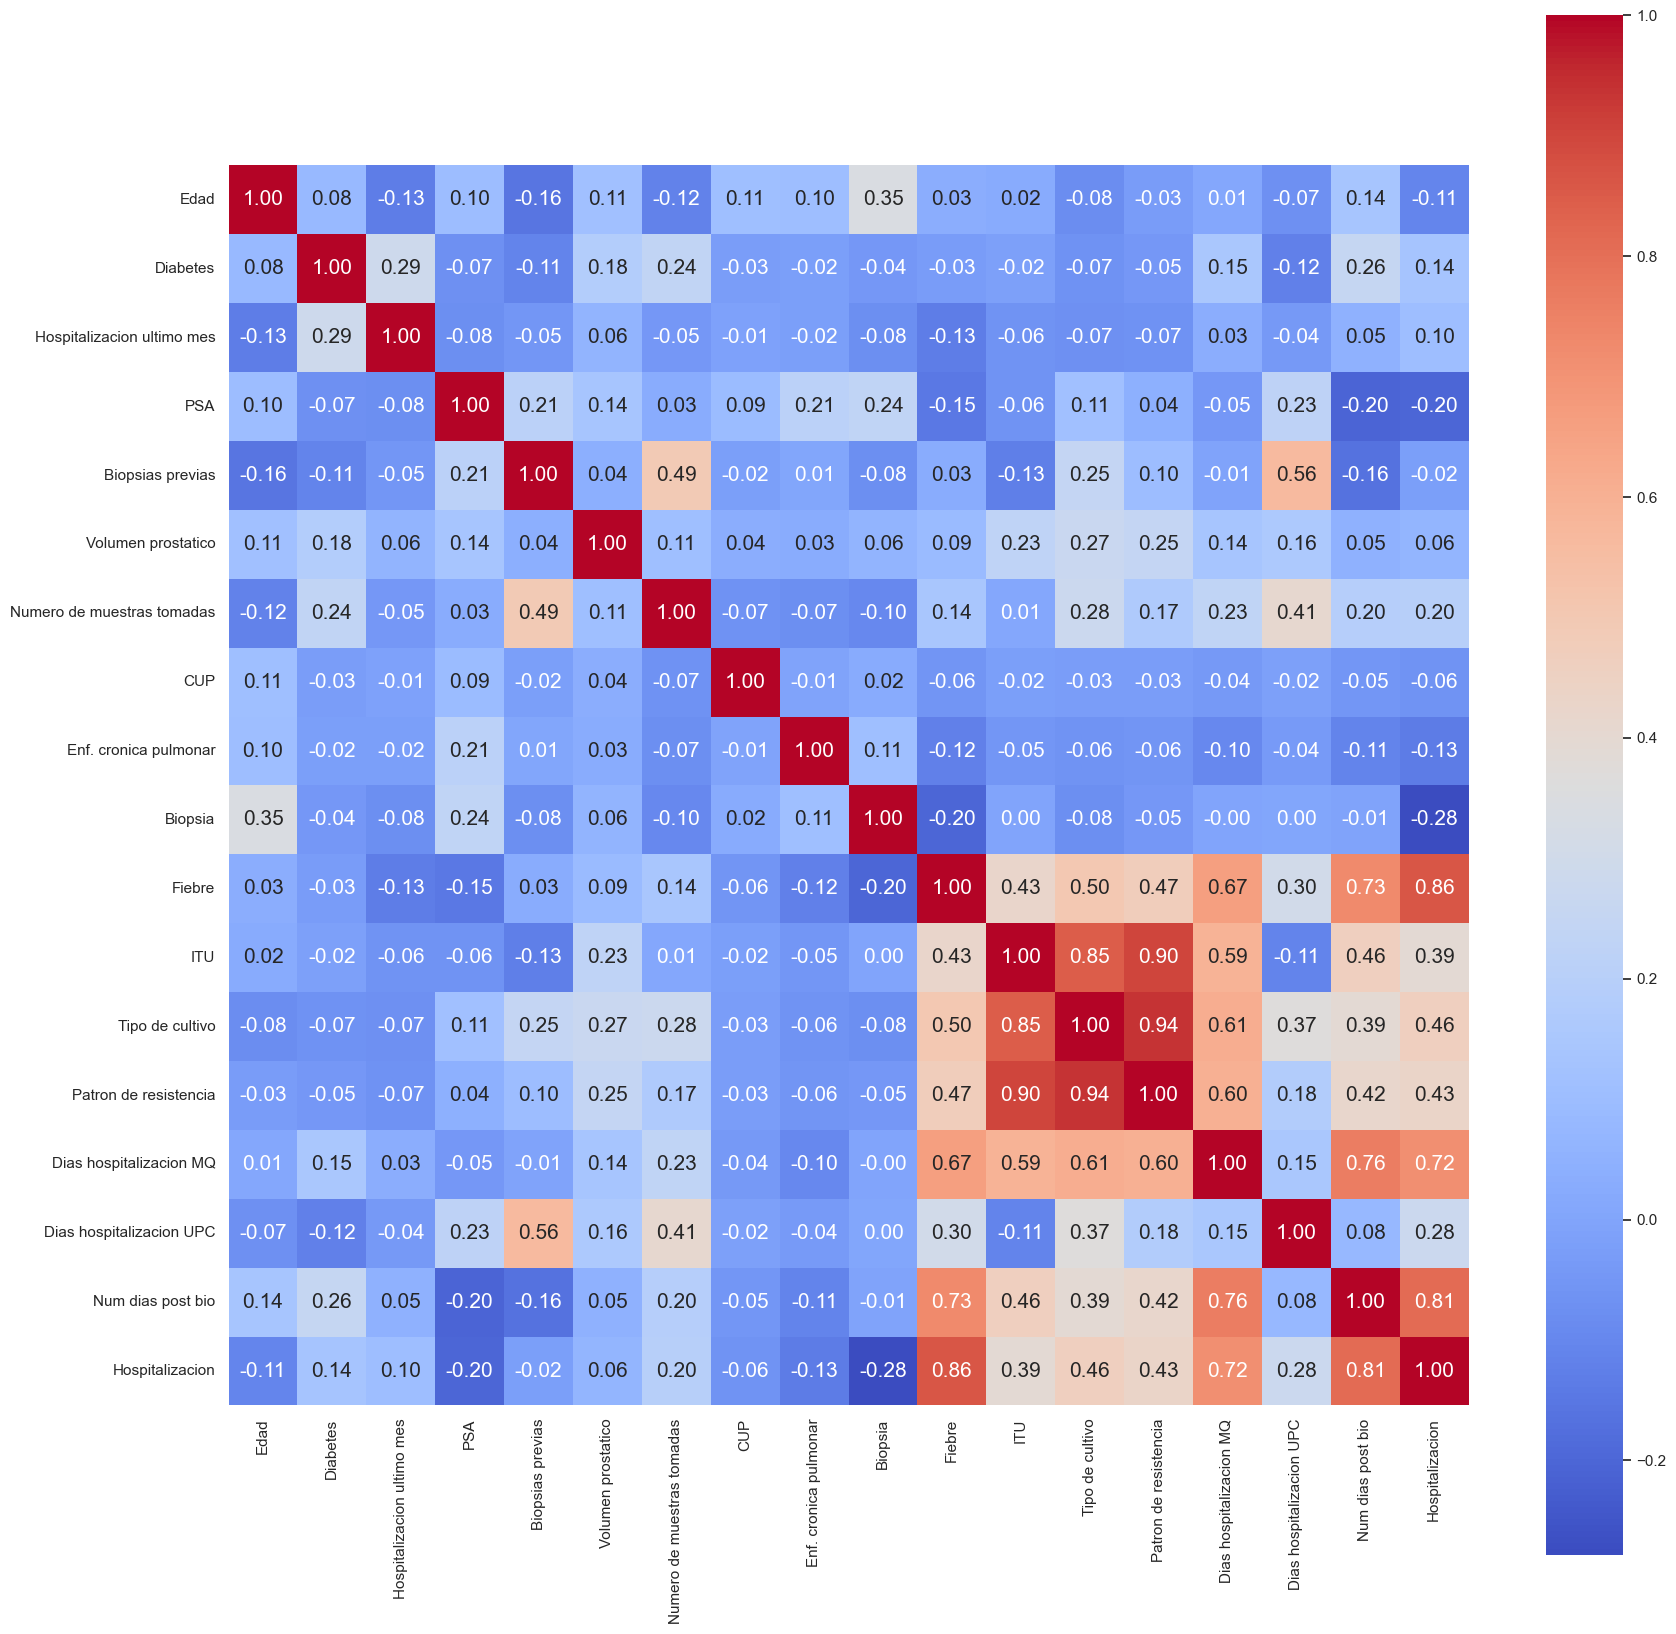

In [9]:
 #Realizamos el mapa de calor para ver la correlación entre las variables

corr = data.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 15},
           xticklabels= data.columns, 
           yticklabels= data.columns,
           cmap= 'coolwarm')
plt.show()

In [10]:
data.head(1)

,Edad,Diabetes,Hospitalizacion ultimo mes,PSA,Biopsias previas,Volumen prostatico,Numero de muestras tomadas,CUP,Enf. cronica pulmonar,Biopsia,Fiebre,ITU,Tipo de cultivo,Patron de resistencia,Dias hospitalizacion MQ,Dias hospitalizacion UPC,Num dias post bio,Hospitalizacion
0,53,0,0,4.0,0,1,12,0,0,0,1,0,0,0,2,0,1,1


In [11]:
columnas = data.columns.tolist()
columnas

['Edad',
 'Diabetes',
 'Hospitalizacion ultimo mes',
 'PSA',
 'Biopsias previas',
 'Volumen prostatico',
 'Numero de muestras tomadas',
 'CUP',
 'Enf. cronica pulmonar',
 'Biopsia',
 'Fiebre',
 'ITU',
 'Tipo de cultivo',
 'Patron de resistencia',
 'Dias hospitalizacion MQ',
 'Dias hospitalizacion UPC',
 'Num dias post bio',
 'Hospitalizacion']

Instanciamos X e y.

In [12]:
X = data.drop(['Hospitalizacion',  "Hospitalizacion ultimo mes", "PSA",	"Numero de muestras tomadas", "Dias hospitalizacion MQ", "Dias hospitalizacion UPC", "Num dias post bio"], axis=1)
#Las columnas seleccionadas en X son variables que no encontre relevantes para nuestra variable objetivo.
y = data['Hospitalizacion']

In [13]:
X.head()

,Edad,Diabetes,Biopsias previas,Volumen prostatico,CUP,Enf. cronica pulmonar,Biopsia,Fiebre,ITU,Tipo de cultivo,Patron de resistencia
0,53,0,0,1,0,0,0,1,0,0,0
1,56,0,0,1,0,0,0,1,0,0,0
2,57,0,1,1,0,0,0,1,0,1,1
3,56,0,0,1,0,0,0,1,0,0,0
4,55,0,1,1,0,0,0,1,0,1,0


Separen el dataset en X_train, X_test, y_train y y_test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=y) #Stratify es para conservar un balance en la separacion de datos de entrenamiento y evaluacion.

In [15]:
#Para ver la propocion de target que tienen 1 en el total de la data.
proporcion = y.sum()/y.count()
print("Proporción de etiquetas en el total de la data:", proporcion)

Proporción de etiquetas en el total de la data: 0.5


In [16]:
print('Proporción de etiquetas en set de entrenamiento:', y_train.sum()/y_train.count())
print('Proporción de etiquetas en set de testeo:', y_test.sum()/y_test.count())

Proporción de etiquetas en set de entrenamiento: 0.5006657789613849
Proporción de etiquetas en set de testeo: 0.4984520123839009


In [17]:
#Estandarizamos
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_train)
X_Test = sc_X.transform(X_test)

Instancien, entrenen y predigan sobre un árbol de decisión asignando una profundidad máxima arbitraria

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [19]:
# Instanciamos el árbol

tree = DecisionTreeClassifier(max_depth = 10)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10)

In [20]:
# Predecimos sobre nuestro set de entrenamiento

y_train_pred = tree.predict(X_train)

# Predecimos sobre nuestro set de test

y_test_pred = tree.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 1.0
Accuracy sobre conjunto de Test: 0.9721362229102167


Realicen la matriz de confusión para este modelo. Se recomienda utilizar mapa de calor para la visualización. 

In [21]:
# Matriz de Confusion

from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión:")
print(cm)

Matriz de confusión:
[[153   9]
 [  0 161]]


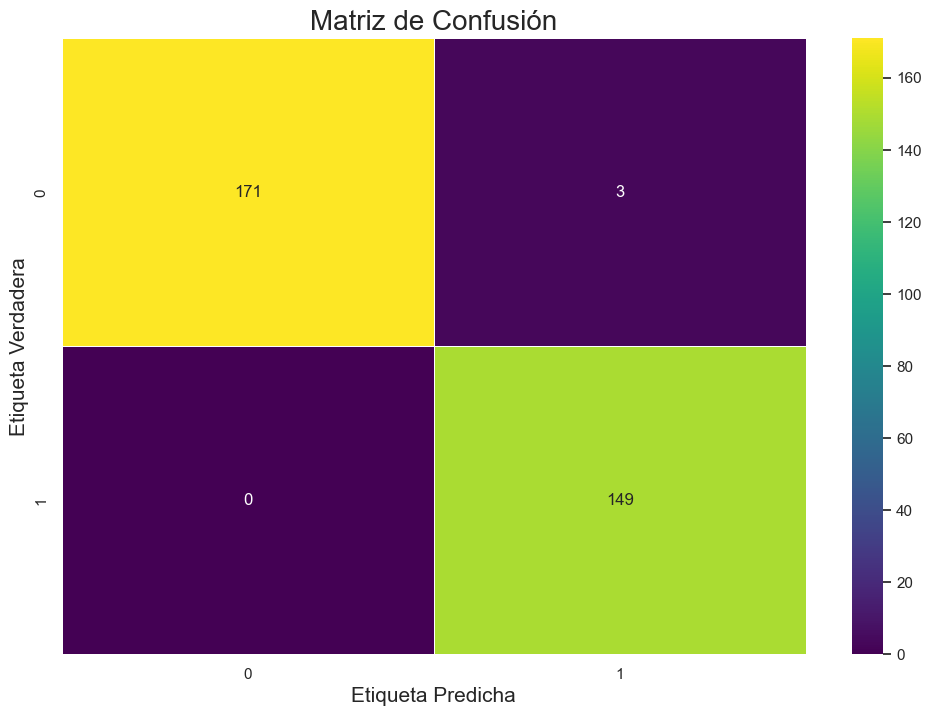

In [40]:
cm = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap='viridis', linewidths=0.5)
plt.title('Matriz de Confusión', fontsize=20)
plt.ylabel('Etiqueta Verdadera', fontsize=15)
plt.xlabel('Etiqueta Predicha', fontsize=15)
plt.show()

Seleccione tres métricas de evaluación para este modelo de clasificación y describa el significado de cada una de ellas para el modelo creado.

In [23]:
#Exactitud
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.9721362229102167


In [24]:
#Precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred, average= None)
print(precision)

[1.         0.94705882]


Precisión: hace referencia a los resultados correctos sobre el total de muestras seleccionadas.

In [25]:
#Exhaustividad/Recall/Sensibilidad
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred, average= None)
print(precision)

[0.94444444 1.        ]


Exhaustividad (sensibilidad o recall): se refiere a los resultados correctos por sobre todos los resultados que buscamos identificar. Es decir, verdaderos positivos sobre los verdaderos positivos + falsos negativos.

Realice un diagrama de la importancia de cada variable respecto a la clasificación de la variable objetivo

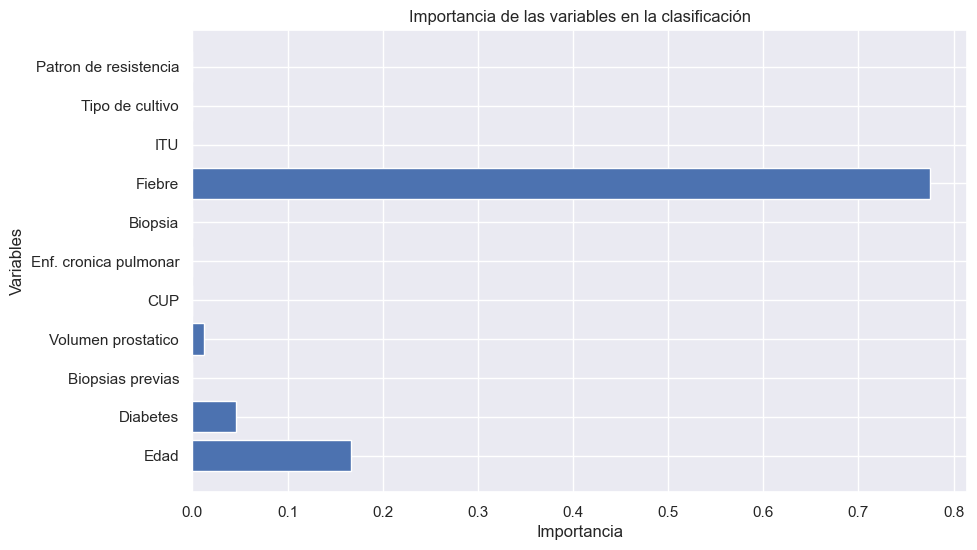

In [26]:
import matplotlib.pyplot as plt

# Obtener la importancia de las variables desde el modelo
importancia_variables = tree.feature_importances_

# Obtener los nombres de las variables
nombres_variables = X.columns.tolist()

# Crear un gráfico de barras para visualizar la importancia de las variables
plt.figure(figsize=(10, 6))
plt.barh(nombres_variables, importancia_variables)
plt.xlabel('Importancia')
plt.ylabel('Variables')
plt.title('Importancia de las variables en la clasificación')
plt.show()


Encuentre cuál sería un valor óptimo para el hiperparámetro **max_depth** para el árbol de decisión. Construya un modelo con este valor y compare las métricas de evaluación respecto al modelo creado con una profundidad arbitraria. 

In [27]:
# Obtener la profundidad del árbol entrenado
profundidad = tree.tree_.max_depth

print("La profundidad del árbol es:", profundidad)

La profundidad del árbol es: 8


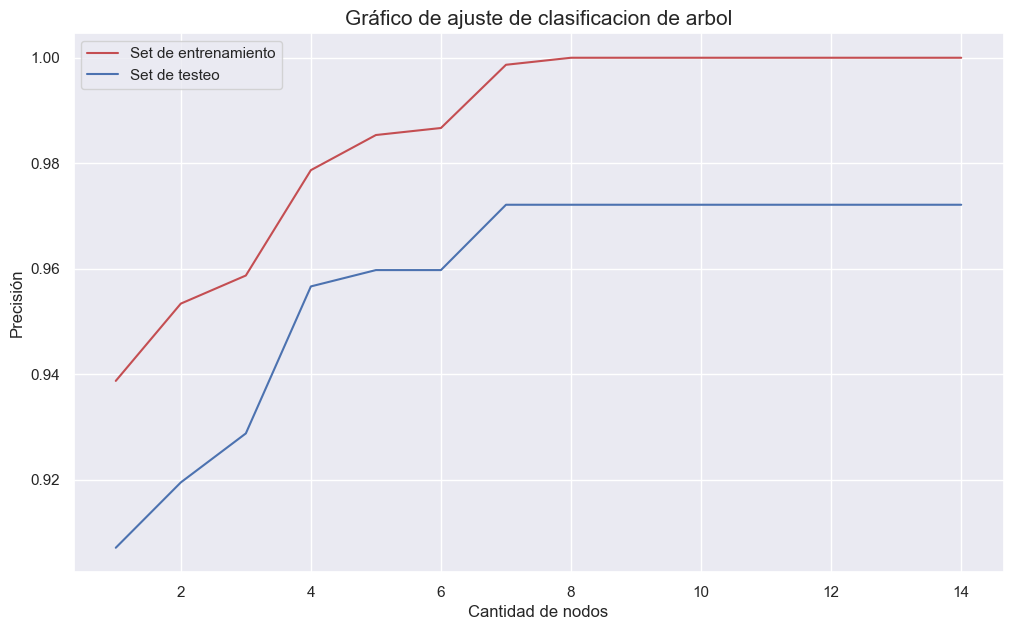

In [28]:
#Grafico de clasificacion por arbol
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 15))

for deep in max_deep_list:
    clf_3 = DecisionTreeClassifier(max_depth = deep)
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de clasificacion de arbol', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Cantidad de nodos')
plt.show()

Instancien, entrenen y predigan sobre un modelo de k-vecinos asignando una cantidad de vecinos k-aribitraria. 

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [30]:
from sklearn.neighbors import KNeighborsClassifier

# Instanciamos el modelo clasificador
    
classifier = KNeighborsClassifier(n_neighbors=3)

In [31]:
# Entrenamos el modelo. Para ello, usamos nuestro set de entrenamiento

classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [32]:
# Predecimos sobre nuestro set de entrenamieto

y_train_pred = classifier.predict(X_train)

# Predecimos sobre nuestro set de testeo

y_test_pred = classifier.predict(X_test)

# Comparamos con las etiquetas reales

print('Accuracy sobre conjunto de Train:', accuracy_score(y_train_pred,y_train))
print('Accuracy sobre conjunto de Test:', accuracy_score(y_test_pred,y_test))

Accuracy sobre conjunto de Train: 0.9946737683089214
Accuracy sobre conjunto de Test: 0.9907120743034056


In [33]:
from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(y_train, y_train_pred)
matrix_2 = confusion_matrix(y_test, y_test_pred)
matrix

array([[359,   4],
       [  0, 388]], dtype=int64)

In [34]:
#Graficamos la matriz
from sklearn.metrics import ConfusionMatrixDisplay

cm_display = ConfusionMatrixDisplay(matrix)
cm_display_2 = ConfusionMatrixDisplay(matrix_2)


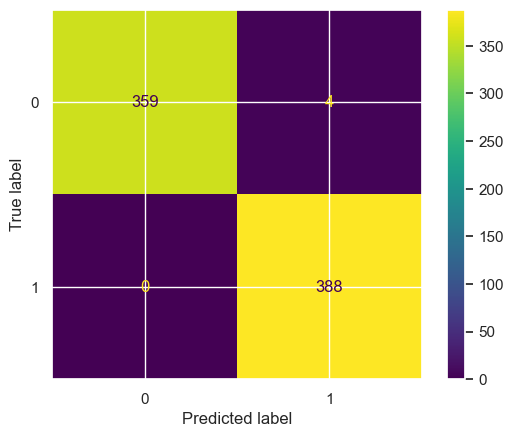

In [35]:
cm_display.plot()
plt.show()

Encuentre el valor óptimo para k

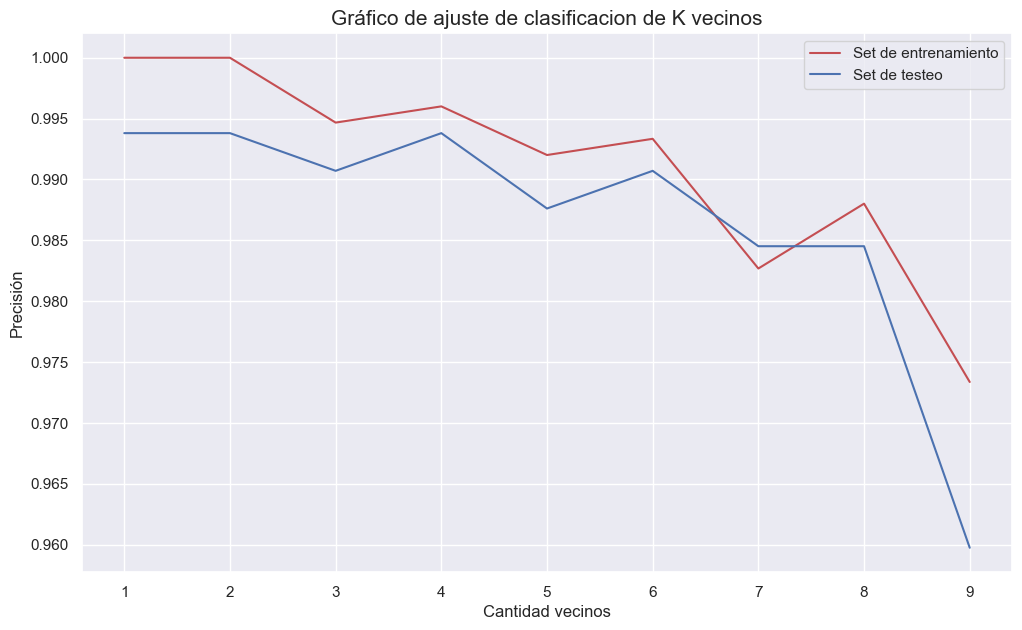

In [36]:
#Grafico de clasificacion por K vecinos
train_prec =  []
eval_prec = []
max_deep_list = list(range(1, 10))

for deep in max_deep_list:
    clf_3 = KNeighborsClassifier(n_neighbors=deep)
    clf_3.fit(X_train, y_train)
    train_prec.append(clf_3.score(X_train, y_train))
    eval_prec.append(clf_3.score(X_test, y_test))

plt.figure(figsize=(12,7))
plt.plot(max_deep_list, train_prec, color='r', label='Set de entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='Set de testeo')
plt.title('Gráfico de ajuste de clasificacion de K vecinos', fontsize = 15)
plt.legend()
plt.ylabel('Precisión')
plt.xlabel('Cantidad vecinos')
plt.show()

Con este grafico vemos que la cantidad de vecinos optima es 2 o 3.

Halle las mismas tres métricas de evaluación para este modelo de clasificación y compare los valores para el performance, respecto al árbol de decisión cuyo hiperparámetro **max_depth** se optimizó. ¿Qué puede concluir? 

In [37]:
#Exactitud
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_test_pred)
print(exactitud)

0.9907120743034056


In [38]:
#Precision
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_test_pred, average= None)
print(precision)

[1.         0.98026316]


In [39]:
#Exhaustividad/Recall/Sensibilidad
from sklearn.metrics import recall_score

precision = recall_score(y_test, y_test_pred, average= None)
print(precision)

[0.98275862 1.        ]


De acuerdo con lo aprendido en el módulo, ¿Cómo cree que se puede mejorar el performance de este modelo? 

Mi conclucion es que el modelo funciono muy bien para predecir los datos, pienso que no se debe hacer mejoras.
Si tendria que hacer mejoras podria aplicar algun metodo de ensamble.